# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
# levantamos los datos
df = pd.read_csv('podcast_dataset.csv')

# peek
df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,Positive,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 52500 non-null  object 
 1   Episode_Title                52500 non-null  object 
 2   Episode_Length_minutes       47254 non-null  float64
 3   Genre                        52500 non-null  object 
 4   Host_Popularity_percentage   52500 non-null  float64
 5   Publication_Day              52500 non-null  object 
 6   Publication_Time             52500 non-null  object 
 7   Guest_Popularity_percentage  47242 non-null  float64
 8   Number_of_Ads                52500 non-null  int64  
 9   Episode_Sentiment            52500 non-null  object 
 10  Listening_Time_minutes       47105 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.4+ MB


In [4]:
# hay filas literalmente duplicadas?
df.duplicated().sum()

np.int64(2500)

In [5]:
# si las hay, las dropeamos
df.drop_duplicates(inplace=True)

# nuevo len
len(df)

50000

In [6]:
# Episode_Title parece ser simplemente el número del episodio encodeado raro, lo miramos
df['Episode_Title'].unique()

array(['Episode 77', 'Episode 6', 'Episode 1', 'Episode 38', 'Episode 73',
       'Episode 87', 'Episode 76', 'Episode 69', 'Episode 72',
       'Episode 10', 'Episode 68', 'Episode 70', 'Episode 29',
       'Episode 40', 'Episode 63', 'Episode 65', 'Episode 52',
       'Episode 86', 'Episode 35', 'Episode 31', 'Episode 8',
       'Episode 48', 'Episode 18', 'Episode 53', 'Episode 14',
       'Episode 95', 'Episode 55', 'Episode 90', 'Episode 96',
       'Episode 88', 'Episode 64', 'Episode 94', 'Episode 75',
       'Episode 39', 'Episode 51', 'Episode 27', 'Episode 74',
       'Episode 78', 'Episode 26', 'Episode 80', 'Episode 84',
       'Episode 34', 'Episode 36', 'Episode 89', 'Episode 16',
       'Episode 46', 'Episode 47', 'Episode 97', 'Episode 19',
       'Episode 54', 'Episode 50', 'Episode 42', 'Episode 61',
       'Episode 82', 'Episode 44', 'Episode 11', 'Episode 99',
       'Episode 12', 'Episode 43', 'Episode 56', 'Episode 66',
       'Episode 22', 'Episode 7', 'Episode 1

In [7]:
# efectivamente lo es, reemplazamos por el número
df['Episode_Number'] = df['Episode_Title'].apply(lambda x: x.split(" ")[-1]).astype(int)

# ahora dropeamos la columna de titulo, que ya no sirve
df.drop(columns='Episode_Title', inplace=True)

In [8]:
# repasamos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 50000 non-null  object 
 1   Episode_Length_minutes       44975 non-null  float64
 2   Genre                        50000 non-null  object 
 3   Host_Popularity_percentage   50000 non-null  float64
 4   Publication_Day              50000 non-null  object 
 5   Publication_Time             50000 non-null  object 
 6   Guest_Popularity_percentage  45014 non-null  float64
 7   Number_of_Ads                50000 non-null  int64  
 8   Episode_Sentiment            50000 non-null  object 
 9   Listening_Time_minutes       44868 non-null  float64
 10  Episode_Number               50000 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 4.6+ MB


In [9]:
# cardinalidad de todas las categóricas
(
    df[df.columns[df.dtypes=='object']]
    .nunique()
    .rename('cardinality')
    .reset_index()
)

,index,cardinality
0,Podcast_Name,48
1,Genre,10
2,Publication_Day,7
3,Publication_Time,4
4,Episode_Sentiment,3


In [10]:
# hay NaNs, vemos cuantas por columna
df.isnull().sum()

Podcast_Name                      0
Episode_Length_minutes         5025
Genre                             0
Host_Popularity_percentage        0
Publication_Day                   0
Publication_Time                  0
Guest_Popularity_percentage    4986
Number_of_Ads                     0
Episode_Sentiment                 0
Listening_Time_minutes         5132
Episode_Number                    0
dtype: int64

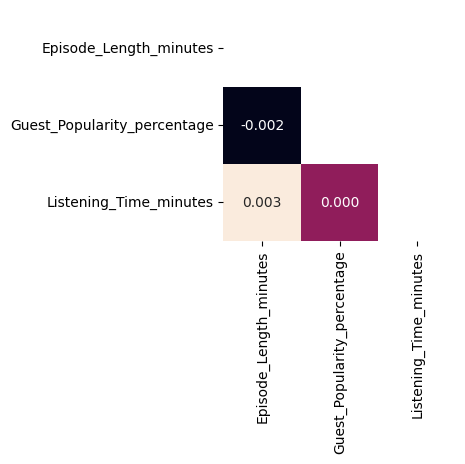

In [11]:
# correlación entre ausencias?
fig, ax = plt.subplots(figsize=(3,3))
nan_corr = df[df.columns[df.isnull().sum() > 0]].isnull().corr()
sns.heatmap(nan_corr, mask=np.triu(nan_corr), cbar=False, annot=True, fmt='.3f')
plt.show()

Como se puede apreciar, las ausencias no están correlacionadas entre sí.

Si bien el diccionario de datos se encuentra en el archivo `podcast_dataset_info.txt`, se provee un resumen dado que son pocas columnas:

Variable | Dtype | Tiene NaNs? | Resumen
:---: | :---: | :---: | :---
Podcast_Name| cat (48) | - | Nombre del podcast  
Episode_Length_minutes| float | 5025 | Cantidad de minutos que dura el episodio
Genre| cat (10) | -   | Uno de 10 géneros de podcast (tech, educación, etc.)
Host_Popularity_percentage| float | - | Score de popularidad del host (en %)
Publication_Day| cat (7) | - | Día de la semana en que fue publicado
Publication_Time| cat (4) | - | Momento del día en que fue publicado (mañana, mediodía, tarde, noche)
Guest_Popularity_percentage| float | 4986 | Score de popularidad del guest (en %)
Number_of_Ads| int | - | Cantidad de publicidades en el episodio
Episode_Sentiment| cat (3) | - | Sentimiento del episodio (negativo, neutral, positivo)
Listening_Time_minutes| float | 5132 | Cantidad media de minutos que se escucha el episodio
Episode_Number| int | - | Número de episodio


Incluso en el caso del nombre de podcast, las categóricas son todas de baja cardinalidad relativo al tamaño del dataset (50k). Dicho eso, en realidad `Episode_Sentiment` es ordinal.
Las variables `Publication_Day` y `Publication_Time` también podrían modelarse como ordinales aunque al ser cíclicas es diferente.

# EDA

## Inicial - pairplot y correlaciones

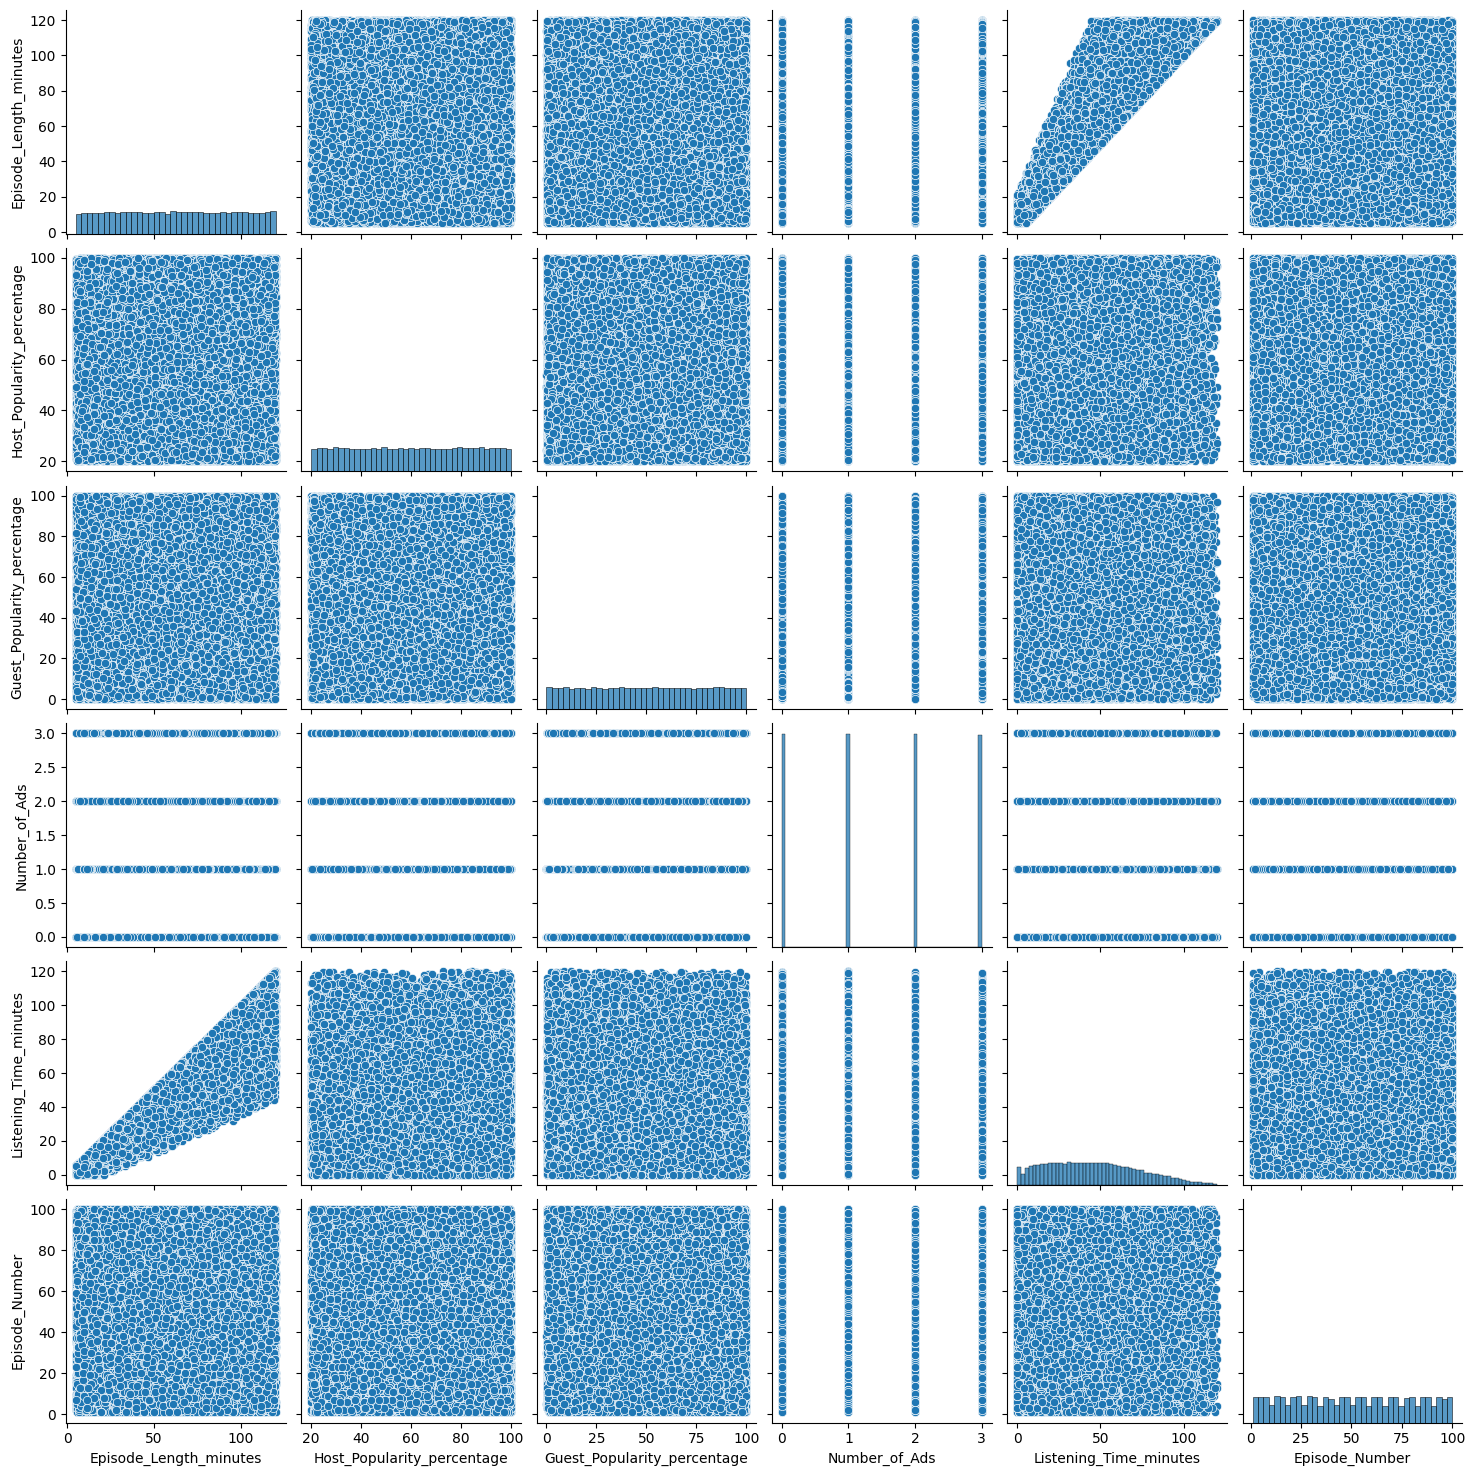

In [12]:
# pairplot inicial sobre las numéricas
sns.pairplot(df)
plt.show()

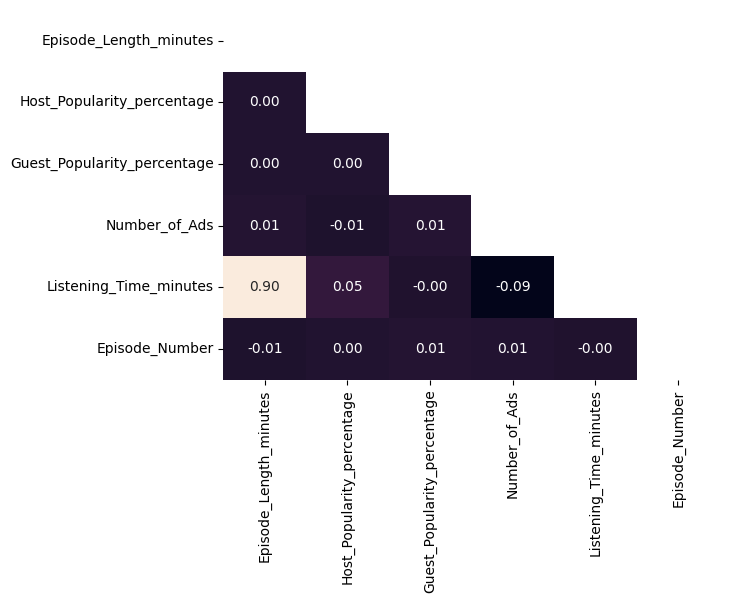

In [13]:
# correlaciones
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, mask=np.triu(corr_matrix), annot=True, fmt='.2f', cbar=False)
plt.show()

* Naturalmente, la duración media de escucha se correlaciona fuertemente con la duración del episodio. Esto sugiere la posibilidad de modelar la fracción de escucha en vez de la duración.
* Se obervan dos correlaciones mínimas pero diferentes de 0, una positiva (0.05) respecto de la popularidad del Host y otra negativa (-0.1) respecto de la cantidad de publicidades. Ambas tienen sentido, aunque cabe destacar que si la popularidad del Host estaba muy poco correlacionada, la del Guest directamente parece no afectar.
* Repetimos el análisis sobre la fracción de escucha.

In [14]:
df['fraction_listened'] = df['Listening_Time_minutes'] / df['Episode_Length_minutes']

df.fraction_listened.describe()

count    40374.000000
mean         0.712985
std          0.214142
min          0.000000
25%          0.578652
50%          0.729499
75%          0.880050
max          1.000000
Name: fraction_listened, dtype: float64

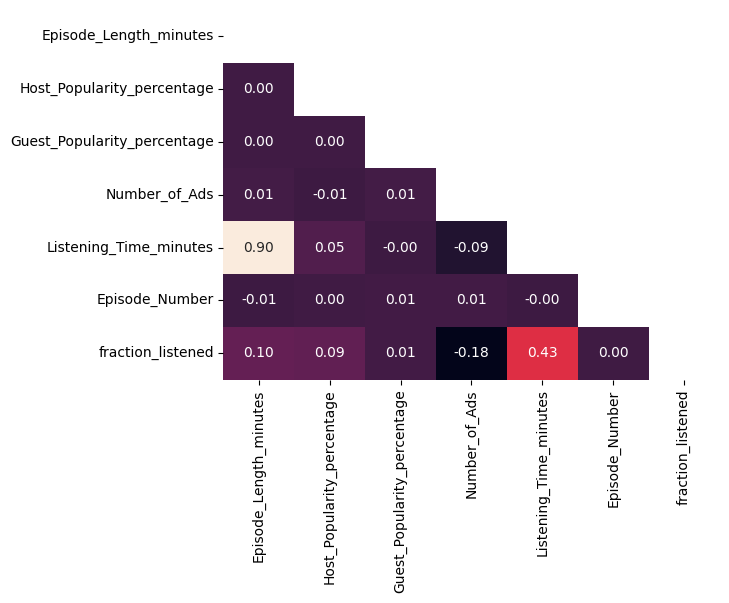

In [15]:
# correlaciones
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, mask=np.triu(corr_matrix), annot=True, fmt='.2f', cbar=False)
plt.show()

* Ahora las correlaciones antes observadas se duplican (aprox.): la popularidad del Host pasa de 0.05 a 0.09 y la cantidad de publicidades de -0.09 a -0.18.

## Dependencia de categóricas (+extras)

Consideramos también el número de ads y el número de episodios, debido a su baja cardinalidad.

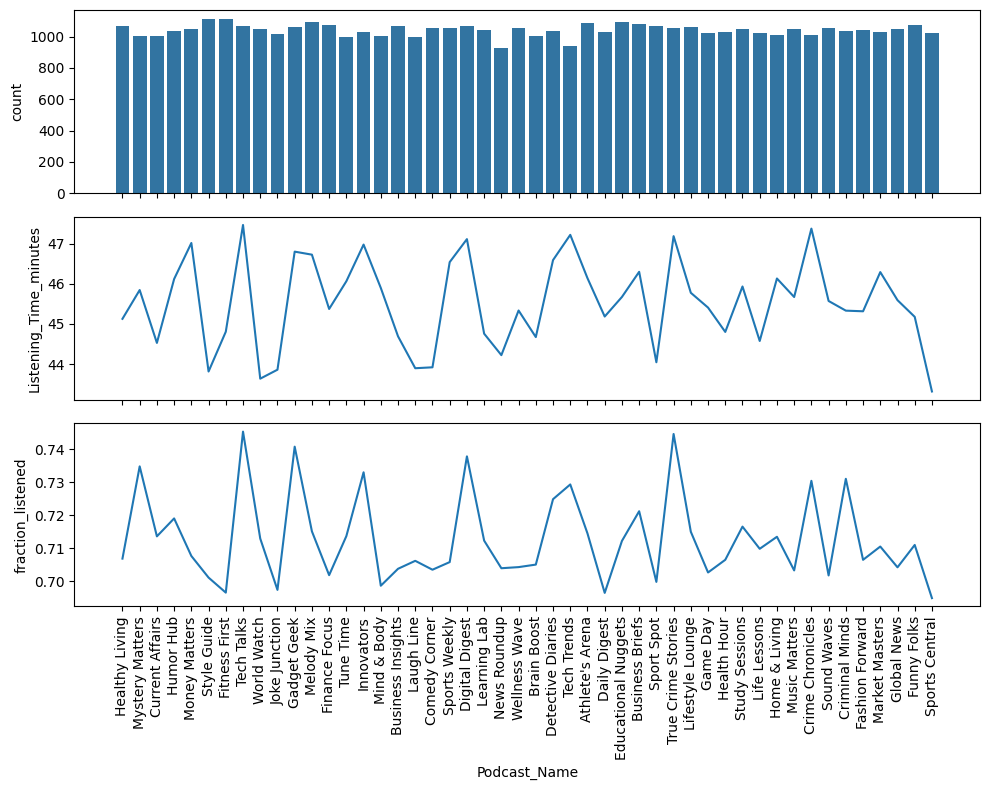

In [16]:
CAT_COL = 'Podcast_Name'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1)

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.xticks(rotation=90)
plt.tight_layout()

* Todas las categorías tienen buena representación.
* Hay dependencia entre el target y la categoría.

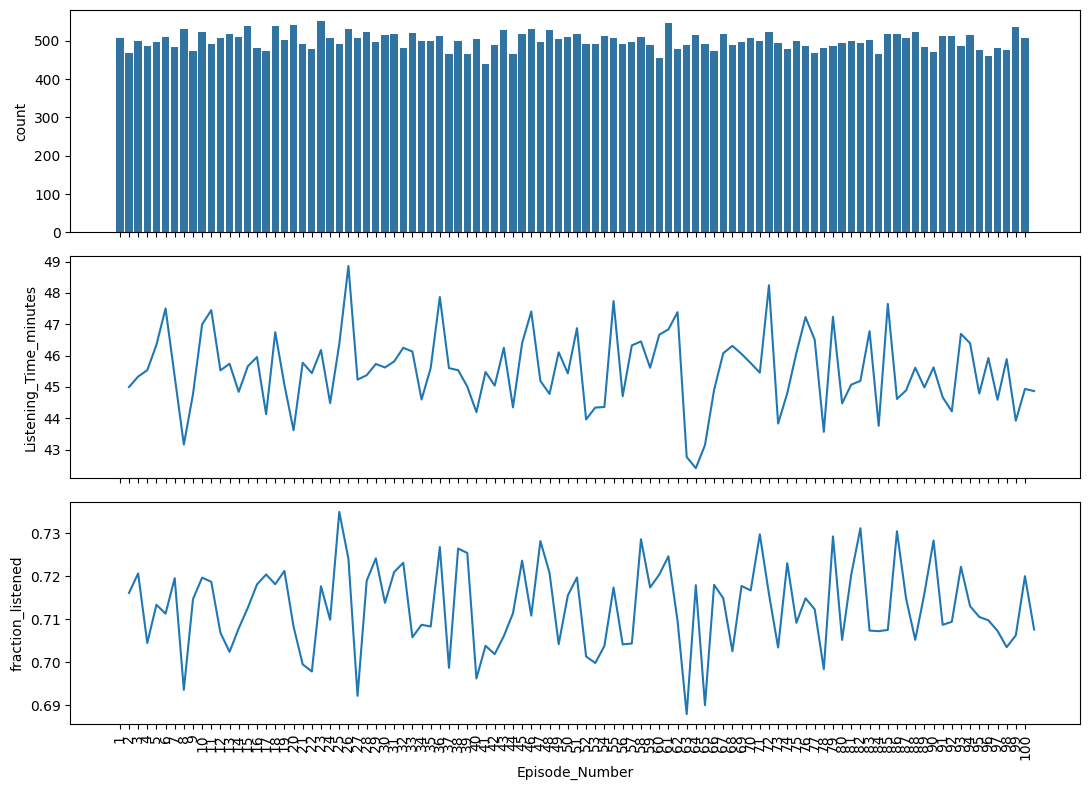

In [17]:
CAT_COL = 'Episode_Number'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(11,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1)

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.xticks(rotation=90)
plt.tight_layout()

Nuevamente, hay buena representación de todos los casos y además hay dependencia, aunque no queda muy claro cómo fluctúa. Uno esperaría cierta tendencia decreciente, sin embargo no es el caso.

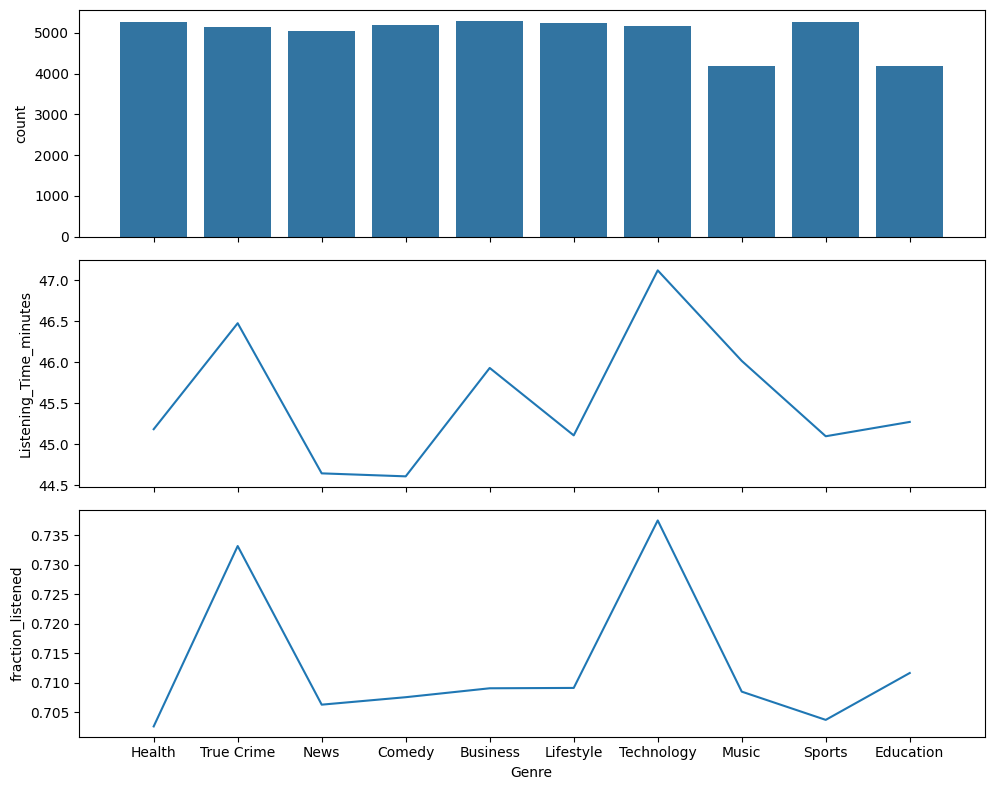

In [18]:
CAT_COL = 'Genre'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1)

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.tight_layout()

Vemos una fuerte dependencia respecto del género, además de buena representación.

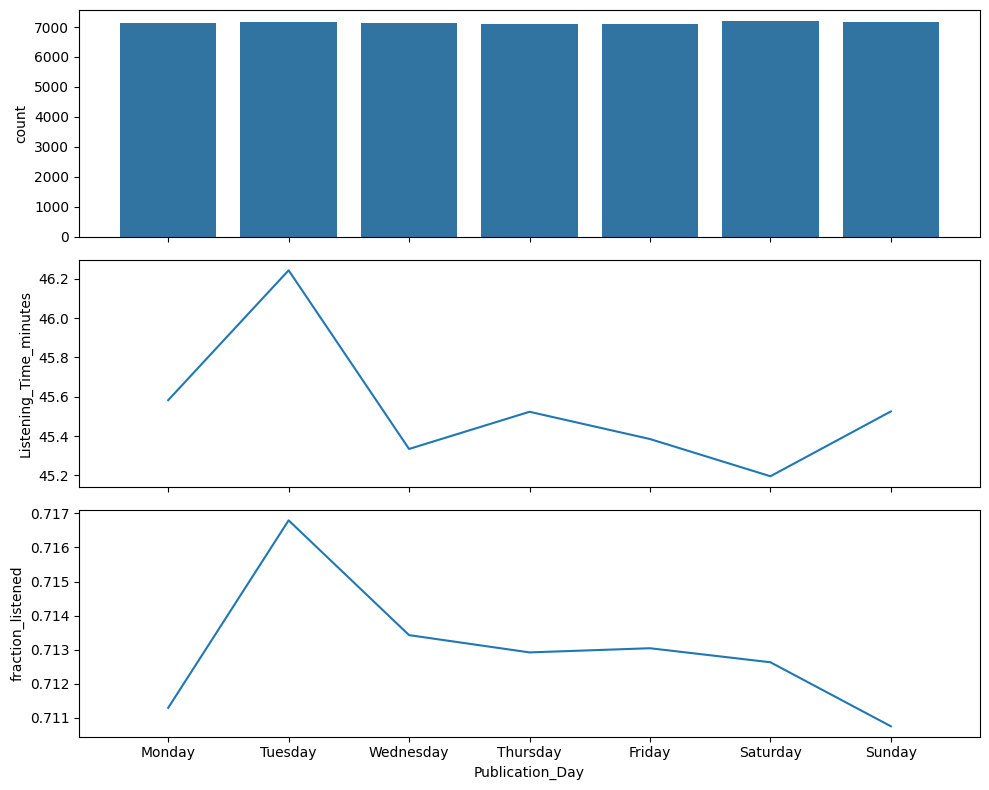

In [19]:
CAT_COL = 'Publication_Day'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.tight_layout()

* Existe una pequeña dependencia entre el target y los días de la semana, aunque no están ordenados en forma temporal. Por ejemplo, el pico tanto en fracción de escucha como en tiempo total ocurre los martes, mientras que los sábados son días "malos" y los domingos incluso peor en términos de fracción pero no tanto en téminos de duración total (se infiere que son podcast en media más largos).
* La cantidad de podcasts por día de la semana es estable, por lo que la variación no depende de ruido por volumen chico.

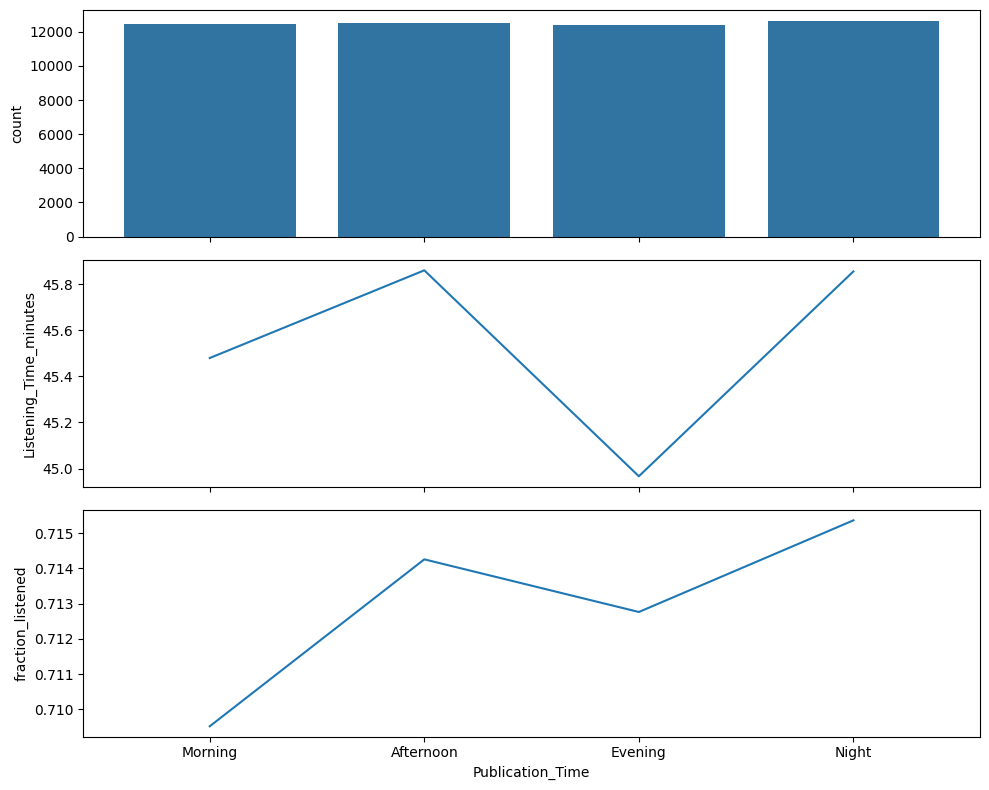

In [20]:
CAT_COL = 'Publication_Time'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1, order=['Morning', 'Afternoon', 'Evening', 'Night'])

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.tight_layout()

Vemos que los podcasts publicados a la tarde temprano y a la noche son los que mejor rendimiento tienen, tanto en términos absolutos como en fracción.

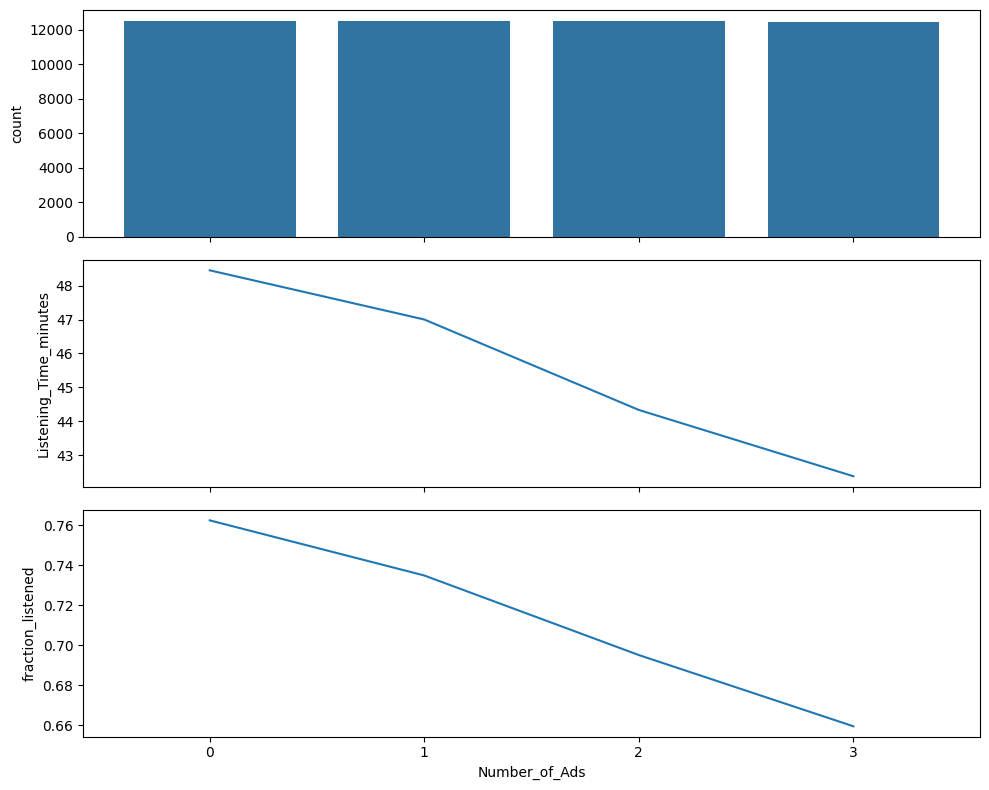

In [21]:
CAT_COL = 'Number_of_Ads'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1)

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.tight_layout()

Como es de esperar, hay una fuerte tendencia negativa respecto de la cantidad de ads.

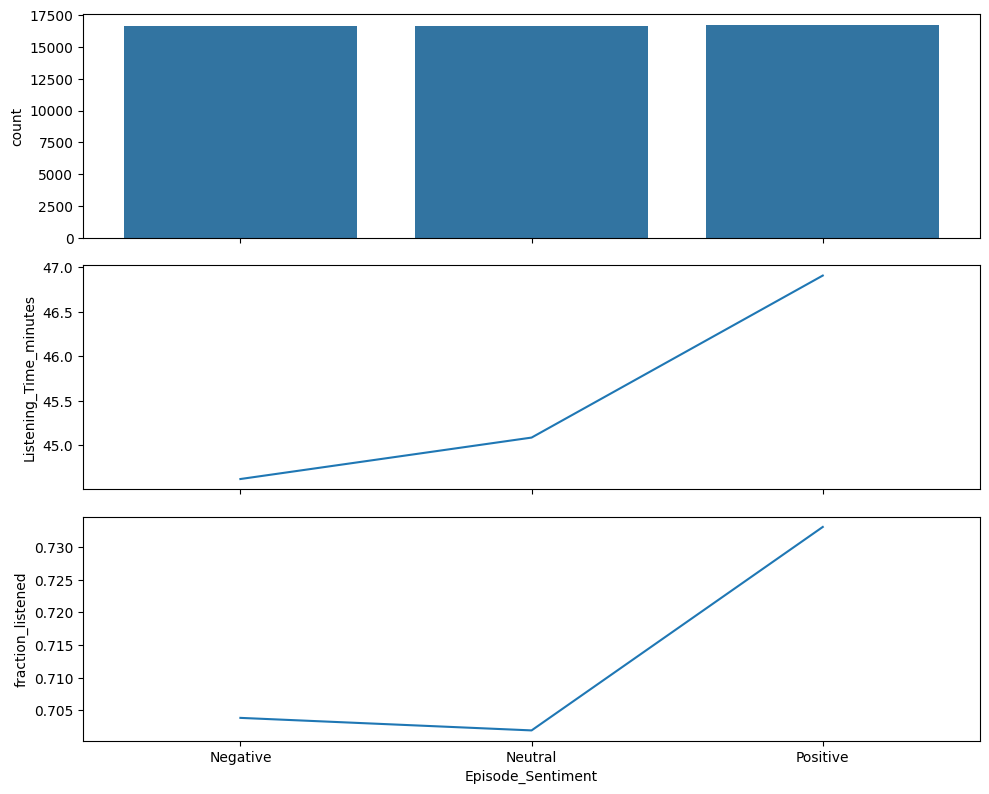

In [22]:
CAT_COL = 'Episode_Sentiment'

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,8), sharex=True)

sns.countplot(df, x=CAT_COL, ax=ax1, order=['Negative','Neutral','Positive'])

aux = df[[CAT_COL, 'Listening_Time_minutes','fraction_listened']].groupby(CAT_COL).mean()

sns.lineplot(aux, x=CAT_COL, y='Listening_Time_minutes', ax=ax2)

sns.lineplot(aux, x=CAT_COL, y='fraction_listened', ax=ax3)

plt.tight_layout()

Vemos que si bien en términos fraccionarios los episodios con sentimiento neutral no son mejores que los negativos, en términos absolutos sí. Esto, nuevamente, puede estar relacionado a confounding variables como sea que los episodios neutrales tengan una duración promedio más alta que los negativos.

Al margen, a los positivos les va mucho mejor que a los otros dos.

## NaNs

Las variables que tienen ausencias son `Episode_Length_minutes`, `Guest_Popularity_percentage` y `Listening_Time_minutes`. Dado que la última es la variable target, no tiene sentido considerar dichas filas. Por otra parte, en ausencia de `Episode_Length_minutes` tampoco resulta razonable intentar predecir cuánto tiempo va a escucharse en promedio el episodio.

Por último, como se aclara en el diccionario de datos, la ausencia en `Guest_Popularity_percentage` indica justamente que _no hay guest_.

In [23]:
# imputamos Guest_Popularity_percentage y generamos feature de presencia/ausencia
df['no_guest'] = df['Guest_Popularity_percentage'].isna()

# se imputa con -1 para que se diferencie de los demás
df.fillna({'Guest_Popularity_percentage':-1}, inplace=True)

In [24]:
# se dropean las filas con NaN en Episode_Length_minutes y Listening_Time_minutes
df.dropna(inplace=True)

# reseteamos index
df.reset_index(inplace=True, drop=True)

# verificamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40374 entries, 0 to 40373
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 40374 non-null  object 
 1   Episode_Length_minutes       40374 non-null  float64
 2   Genre                        40374 non-null  object 
 3   Host_Popularity_percentage   40374 non-null  float64
 4   Publication_Day              40374 non-null  object 
 5   Publication_Time             40374 non-null  object 
 6   Guest_Popularity_percentage  40374 non-null  float64
 7   Number_of_Ads                40374 non-null  int64  
 8   Episode_Sentiment            40374 non-null  object 
 9   Listening_Time_minutes       40374 non-null  float64
 10  Episode_Number               40374 non-null  int64  
 11  fraction_listened            40374 non-null  float64
 12  no_guest                     40374 non-null  bool   
dtypes: bool(1), floa

## Encoding

In [25]:
# encodeamos el sentiment como ordinal
df['sentiment_encoded'] = df['Episode_Sentiment'].map({'Neutral':0, 'Negative':-1, 'Positive':1}).astype(int)

# dropeamos la columna ahora innecesaria de Sentiment
df.drop(columns='Episode_Sentiment', inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40374 entries, 0 to 40373
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 40374 non-null  object 
 1   Episode_Length_minutes       40374 non-null  float64
 2   Genre                        40374 non-null  object 
 3   Host_Popularity_percentage   40374 non-null  float64
 4   Publication_Day              40374 non-null  object 
 5   Publication_Time             40374 non-null  object 
 6   Guest_Popularity_percentage  40374 non-null  float64
 7   Number_of_Ads                40374 non-null  int64  
 8   Listening_Time_minutes       40374 non-null  float64
 9   Episode_Number               40374 non-null  int64  
 10  fraction_listened            40374 non-null  float64
 11  no_guest                     40374 non-null  bool   
 12  sentiment_encoded            40374 non-null  int64  
dtypes: bool(1), floa